<a href="https://colab.research.google.com/github/ZachGermain/Asteroid_Clustering/blob/master/Code/Asteroid_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
import sklearn as skl
from sklearn import preprocessing #sklearn does not automatically import subpackages
from sklearn import manifold
from sklearn import cluster
import seaborn

# **Data Opening and Preprocessing**

In [2]:
#astDf = pd.read_csv("https://raw.githubusercontent.com/ZachGermain/Asteroid_Clustering/master/Data/asteroidsBelt.csv") #Whole belt by JPL
astDf = pd.read_csv("https://raw.githubusercontent.com/ZachGermain/Asteroid_Clustering/master/Data/asteroidsMainBelt.csv") #Main belt by JPL
astDf = astDf.set_index('id')
astDf.head()

,spec_B,e,a,i
id,,,,
a0000001,C,0.076009,2.769165,10.594067
a0000002,B,0.230337,2.772466,34.836234
a0000003,Sk,0.256942,2.669150,12.988919
a0000004,V,0.088721,2.361418,7.141771
a0000005,S,0.191095,2.574249,5.366988


In [3]:
astDf.shape

(1212, 4)

In [4]:
astDf.describe()

,e,a,i
count,1212.000000,1212.000000,1212.000000
mean,0.143217,2.654361,8.519452
std,0.070464,0.262556,5.724792
min,0.004735,2.125690,0.264810
25%,0.086395,2.415790,4.608699
50%,0.140735,2.724440,7.270116
75%,0.190543,2.791325,10.786604
max,0.380217,3.197464,35.852723


In [5]:
np.unique(astDf.spec_B)

array(['A', 'B', 'C', 'Cb', 'Cg', 'Cgh', 'Ch', 'D', 'K', 'L', 'Ld', 'O',
       'R', 'S', 'Sa', 'Sk', 'Sl', 'Sq', 'Sr', 'T', 'V', 'X', 'Xc', 'Xe',
       'Xk'], dtype=object)

In [6]:
for i in np.unique(astDf.spec_B):
  print("{0}: {1}".format(i, list(astDf.spec_B).count(i)))

A: 9
B: 55
C: 137
Cb: 27
Cg: 8
Cgh: 15
Ch: 133
D: 6
K: 31
L: 32
Ld: 11
O: 1
R: 4
S: 346
Sa: 29
Sk: 12
Sl: 45
Sq: 44
Sr: 11
T: 10
V: 35
X: 102
Xc: 54
Xe: 20
Xk: 35


## **Data Reduction**

Some data preprocessing: 
  Replacing transitional types with original types (not done in paper).
    Lets similar types be grouped together.
  Getting rid of types with a small number of the asteroids of the S-type as these are closer to outliers than clusters.

In [7]:
'''
cTransitions = [ 'Cb', 'Cg', 'Cgh', 'Ch' ]
sTransitions = [ 'Sa', 'Sk', 'Sl', 'Sq', 'Sr' ]
xTransitions  = [ 'Xc', 'Xe', 'Xk' ]
lTransitions = [ 'Ld' ]

for c in cTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(c, 'C')

for s in sTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(s, 'S')

for x in xTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(x, 'X')

for l in lTransitions:
  astDf["spec_B"] = astDf["spec_B"].str.replace(l, 'L')

np.unique(astDf.spec_B)
'''

'\ncTransitions = [ \'Cb\', \'Cg\', \'Cgh\', \'Ch\' ]\nsTransitions = [ \'Sa\', \'Sk\', \'Sl\', \'Sq\', \'Sr\' ]\nxTransitions  = [ \'Xc\', \'Xe\', \'Xk\' ]\nlTransitions = [ \'Ld\' ]\n\nfor c in cTransitions:\n  astDf["spec_B"] = astDf["spec_B"].str.replace(c, \'C\')\n\nfor s in sTransitions:\n  astDf["spec_B"] = astDf["spec_B"].str.replace(s, \'S\')\n\nfor x in xTransitions:\n  astDf["spec_B"] = astDf["spec_B"].str.replace(x, \'X\')\n\nfor l in lTransitions:\n  astDf["spec_B"] = astDf["spec_B"].str.replace(l, \'L\')\n\nnp.unique(astDf.spec_B)\n'

In [8]:

#tinyTypes = [ 'A', 'D', 'O', 'R', 'T', 'U' ] #Cutoff of 20 and transition state reduced
tinyTypes = [ 'A', 'Cg', 'Cgh', 'D', 'Ld', 'O', 'R', 'Sk', 'Sr', 'T', 'U', 'Xe' ] #Cutoff of 20 and not reduced
#tinyTypes = [ 'A', 'Cb', 'Cg', 'Cgh', 'D', 'K', 'L', 'Ld', 'O', 'R', 'Sa',
#             'Sk', 'Sl', 'Sq', 'Sr', 'T', 'U', 'V', 'Xe', 'Xk' ] #Cutoff of 50 and not reduced

for t in tinyTypes:
  astDf = astDf[ astDf["spec_B"] != t ]

np.unique(astDf.spec_B)


array(['B', 'C', 'Cb', 'Ch', 'K', 'L', 'S', 'Sa', 'Sl', 'Sq', 'V', 'X',
       'Xc', 'Xk'], dtype=object)

In [9]:
for i in np.unique(astDf.spec_B):
  print("{0}: {1}".format(i, list(astDf.spec_B).count(i)))

B: 55
C: 137
Cb: 27
Ch: 133
K: 31
L: 32
S: 346
Sa: 29
Sl: 45
Sq: 44
V: 35
X: 102
Xc: 54
Xk: 35


In [10]:
astDf.head()

,spec_B,e,a,i
id,,,,
a0000001,C,0.076009,2.769165,10.594067
a0000002,B,0.230337,2.772466,34.836234
a0000004,V,0.088721,2.361418,7.141771
a0000005,S,0.191095,2.574249,5.366988
a0000006,S,0.203007,2.425160,14.737901


In [11]:
astDf.describe()

,e,a,i
count,1105.000000,1105.000000,1105.000000
mean,0.143085,2.649848,8.528227
std,0.070539,0.265400,5.773426
min,0.004735,2.125690,0.264810
25%,0.086348,2.405197,4.649132
50%,0.140732,2.720883,7.258719
75%,0.190610,2.790982,10.716470
max,0.380217,3.197464,35.852723


The reduction does not seem to have a significant effect on the data distribution.

## **Separate Data into Orbital Parameters and Taxonomy**

In [12]:
taxonomy = astDf[['spec_B']]
taxonomy.head()

,spec_B
id,
a0000001,C
a0000002,B
a0000004,V
a0000005,S
a0000006,S


In [13]:
astDf = astDf.drop(labels = 'spec_B', axis = 1)
astDf.head()

,e,a,i
id,,,
a0000001,0.076009,2.769165,10.594067
a0000002,0.230337,2.772466,34.836234
a0000004,0.088721,2.361418,7.141771
a0000005,0.191095,2.574249,5.366988
a0000006,0.203007,2.425160,14.737901


## **Scaling Data**

In [14]:
astScaled = preprocessing.scale(astDf)
astScaled.mean(0).round(2), astScaled.std(0)

(array([-0., -0., -0.]), array([1., 1., 1.]))

# **Data Visualization**

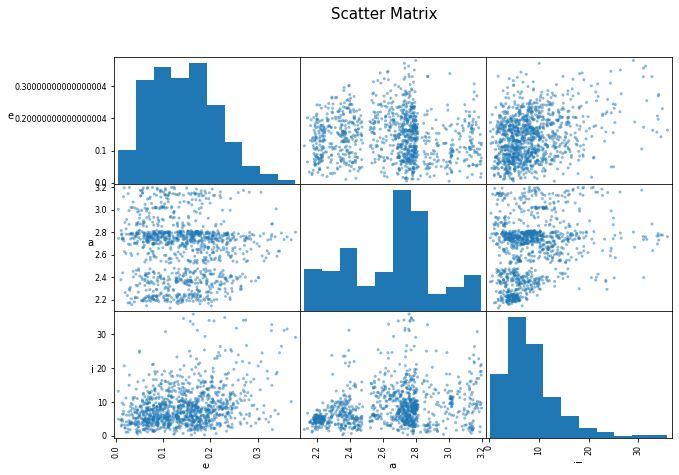

In [15]:
axs = pd.plotting.scatter_matrix(astDf, figsize=(10,7));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            #to make x axis name vertical  
            axs[x, y].xaxis.label.set_rotation(90);
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0);
pl.suptitle("Scatter Matrix", size = 15);

Shows no correlation between orbital parameters.

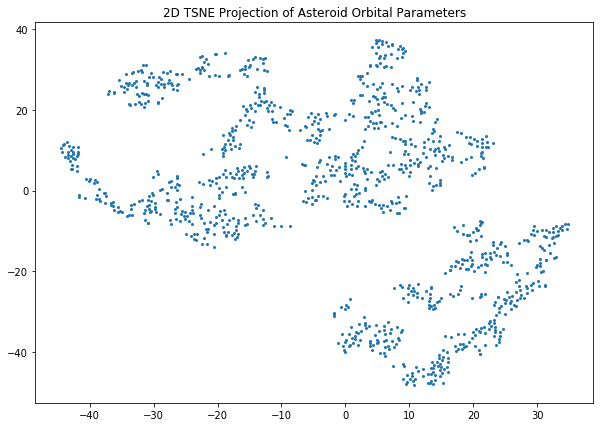

In [16]:
twodproj = manifold.TSNE(random_state = 7).fit_transform(astScaled)
pl.figure(figsize = (10,7))
pl.scatter(twodproj[:,0], twodproj[:,1], s = 4)
pl.title("2D TSNE Projection of Asteroid Orbital Parameters");

# **Clustering**

## **Finding Cluster Centers**

In [17]:
numClusters = len(np.unique(taxonomy.spec_B))
numClusters

14

In [18]:
clusterCenter = np.zeros((numClusters, 3))
clusterTaxonLabels = np.unique(taxonomy.spec_B)

for taxon, clustNum in zip(clusterTaxonLabels, range(0, numClusters)):
  indices = np.flatnonzero(taxonomy['spec_B'] == taxon)
  a = astScaled[indices, 0]
  e = astScaled[indices, 1]
  i = astScaled[indices, 2]
  clusterCenter[clustNum, 0] = a.mean()
  clusterCenter[clustNum, 1] = e.mean()
  clusterCenter[clustNum, 2] = i.mean()

clusterCenter, clusterTaxonLabels

(array([[ 4.37048392e-01,  3.37863653e-01,  4.65636783e-01],
        [ 1.72948857e-02,  4.43075932e-01,  1.27690686e-01],
        [ 2.38090135e-01,  2.90898339e-01, -7.21822463e-02],
        [ 2.58697668e-01,  3.86483099e-01,  1.05227107e-01],
        [-2.34243983e-01,  7.48659289e-01,  2.09660869e-01],
        [-2.51724603e-01,  2.42361395e-01,  7.00650317e-02],
        [ 7.86080076e-05, -4.25836781e-01, -1.59724502e-01],
        [-2.23330626e-01, -6.57778695e-01, -8.17952625e-02],
        [-1.60963538e-01, -5.54133319e-01, -2.20333883e-01],
        [-1.28803837e-01,  4.45875343e-02, -4.18091355e-01],
        [-5.49448626e-01, -1.06523677e+00, -4.38755677e-01],
        [-4.85613286e-02,  4.10820153e-01,  1.98104919e-01],
        [-1.95348878e-01,  1.32046851e-01,  2.62511797e-01],
        [ 6.19251730e-02,  2.32398408e-01,  8.65827127e-02]]),
 array(['B', 'C', 'Cb', 'Ch', 'K', 'L', 'S', 'Sa', 'Sl', 'Sq', 'V', 'X',
        'Xc', 'Xk'], dtype=object))

Interestingly enough, one can see significant differences of the means between clusters

## **K-Means Clustering Using One Iteration of Centers**

In [19]:
clusteredAst = cluster.KMeans(n_clusters=numClusters, init = clusterCenter).fit(astScaled)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


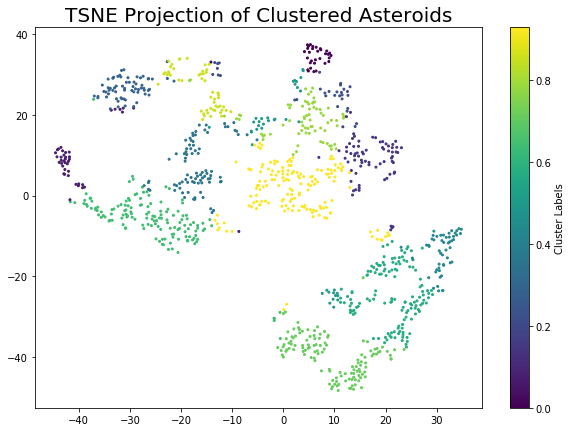

In [20]:
twodproj = manifold.TSNE(random_state = 7).fit_transform(astScaled)
pl.figure(figsize = (10,7))
pl.scatter(twodproj[:,0], twodproj[:,1], c = clusteredAst.labels_/clusteredAst.n_clusters,
           s = 4)
pl.colorbar(label = "Cluster Labels")
pl.title("TSNE Projection of Clustered Asteroids", size = 20);

In [21]:
clusterTaxonCts = np.zeros((numClusters, numClusters))
clusterCts = np.zeros(numClusters)

for clustNum in np.unique(clusteredAst.labels_):
  clusterIndices = np.flatnonzero(clusteredAst.labels_ == clustNum)
  taxons = taxonomy.spec_B[ clusterIndices ]
  clusterCts[clustNum] = taxons.count()
  for taxon, taxonNum in zip(np.unique(taxonomy.spec_B), range(0, numClusters)):
    clusterTaxonCts[clustNum][taxonNum]  = taxons[ taxons == taxon ].count()

print("Order of Taxons:\n", np.unique(taxonomy.spec_B))
print("Taxon Counts per Cluster:\n", clusterTaxonCts)
print("Counts per Cluster:\n", clusterCts)

Order of Taxons:
 ['B' 'C' 'Cb' 'Ch' 'K' 'L' 'S' 'Sa' 'Sl' 'Sq' 'V' 'X' 'Xc' 'Xk']
Taxon Counts per Cluster:
 [[ 9.  4.  2.  1.  1.  0.  8.  1.  1.  1.  0.  1.  3.  0.]
 [10.  7.  2.  9.  1.  0.  5.  0.  0.  0.  0.  5.  2.  0.]
 [ 1. 13.  3. 21.  3.  0. 14.  1.  2.  4.  0.  4.  3.  4.]
 [ 2.  5.  1.  4.  1.  2.  3.  0.  0.  0.  0.  8.  3.  2.]
 [ 0.  9.  1. 11. 16.  2.  5.  0.  1.  1.  0. 10.  5.  3.]
 [ 3. 11.  2.  6.  1.  1. 36.  1.  1.  3.  0. 11.  5.  4.]
 [ 2.  2.  0.  5.  0.  3. 32.  1.  2.  1.  1.  1.  2.  0.]
 [ 1.  4.  0.  8.  3.  2.  9.  4.  3.  1.  1.  0.  3.  1.]
 [10. 12.  4.  4.  0.  0. 61.  7. 14.  4. 11.  3.  4.  2.]
 [ 2. 21.  4. 12.  4. 11. 36.  6.  5. 14.  0. 17.  7.  5.]
 [ 2.  4.  0.  5.  0.  1. 58.  4.  8.  4. 22.  5. 10.  4.]
 [ 4. 10.  1. 14.  1.  2. 22.  2.  1.  2.  0. 11.  0.  2.]
 [ 2. 14.  0.  6.  0.  5.  9.  0.  1.  0.  0.  7.  5.  3.]
 [ 7. 21.  7. 27.  0.  3. 48.  2.  6.  9.  0. 19.  2.  5.]]
Counts per Cluster:
 [ 32.  41.  73.  31.  64.  85.  52.  40. 1

## **K-Means Clustering using n-Iterations**

Order of Taxons:
 ['B' 'C' 'Cb' 'Ch' 'K' 'L' 'S' 'Sa' 'Sl' 'Sq' 'V' 'X' 'Xc' 'Xk']
Taxon Counts per Cluster:
 [[ 8. 19.  4. 25.  0.  4. 41.  2.  5.  5.  0. 15.  2.  2.]
 [ 2.  4.  0.  6.  0.  2. 58.  4.  8.  3. 22.  5. 10.  4.]
 [ 1.  9.  0.  6.  1.  4. 21.  3.  2.  0.  0. 12.  6.  3.]
 [ 2.  2.  1.  8.  2.  0.  7.  1.  1.  1.  0.  8.  3.  4.]
 [ 3. 18.  1. 11.  3.  6. 41.  0.  3. 14.  0.  8.  3.  7.]
 [ 9.  5.  1.  0.  1.  0.  5.  1.  0.  1.  0.  1.  4.  0.]
 [ 2.  2.  0.  5.  0.  3. 35.  1.  2.  2.  1.  1.  2.  0.]
 [10.  8.  2.  9.  1.  0.  5.  0.  0.  0.  0.  5.  2.  0.]
 [11. 14.  4.  5.  0.  0. 65.  7. 15.  4. 12.  3.  6.  2.]
 [ 1. 12.  2. 12. 16.  3.  7.  0.  1.  1.  0. 10.  6.  3.]
 [ 2.  8.  1.  5.  0.  1.  3.  0.  0.  0.  0.  2.  1.  1.]
 [ 2. 18.  5.  8.  2.  6. 26.  6.  5.  7.  0. 15.  5.  3.]
 [ 1. 13.  5. 23.  3.  0. 18.  2.  1.  5.  0.  9.  3.  2.]
 [ 1.  5.  1. 10.  2.  3. 14.  2.  2.  1.  0.  8.  1.  4.]]
Counts per Cluster:
 [132. 128.  68.  40. 118.  28.  56.  42. 1

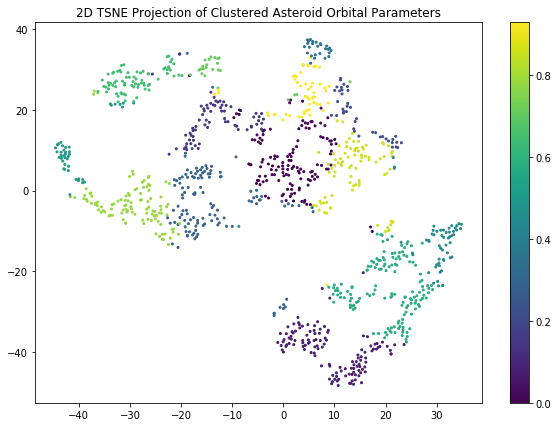

In [22]:
nIter = 10; #1000 iterations has similar numerical results 

clusteredAst2 = cluster.KMeans(n_clusters=numClusters, n_init = nIter, random_state = 17).fit(astScaled)

twodproj2 = manifold.TSNE(random_state = 7).fit_transform(astScaled)
pl.figure(figsize = (10,7))
pl.scatter(twodproj[:,0], twodproj[:,1], c = clusteredAst2.labels_/clusteredAst2.n_clusters,
           s = 4)
pl.colorbar()
pl.title("2D TSNE Projection of Clustered Asteroid Orbital Parameters");

clusterTaxonCts2 = np.zeros((numClusters, numClusters))
clusterCts2 = np.zeros(numClusters)

for clustNum in np.unique(clusteredAst2.labels_):
  clusterIndices2 = np.flatnonzero(clusteredAst2.labels_ == clustNum)
  taxons2 = taxonomy.spec_B[ clusterIndices2 ]
  clusterCts2[clustNum] = taxons2.count()
  for taxon, taxonNum in zip(np.unique(taxonomy.spec_B), range(0, numClusters)):
    clusterTaxonCts2[clustNum][taxonNum]  = taxons2[ taxons2 == taxon ].count()

print("Order of Taxons:\n", np.unique(taxonomy.spec_B))
print("Taxon Counts per Cluster:\n", clusterTaxonCts2)
print("Counts per Cluster:\n", clusterCts2)

# **Cluster Analysis**

Using clustering based on center points

## **Purity Per Cluster**

In [23]:
totPurityArr = np.zeros(numClusters)
for taxon, taxonNum in zip(np.unique(taxonomy.spec_B), range(0, numClusters)):
  totPurityArr[taxonNum] = (taxonomy.spec_B[taxonomy.spec_B == taxon]).count()/taxonomy.spec_B.count()

for taxon, taxonNum in zip(np.unique(taxonomy.spec_B), range(0, numClusters)):
  print("{0}: {1:.3f}".format(np.unique(taxonomy.spec_B)[taxonNum], totPurityArr[taxonNum]))

B: 0.050
C: 0.124
Cb: 0.024
Ch: 0.120
K: 0.028
L: 0.029
S: 0.313
Sa: 0.026
Sl: 0.041
Sq: 0.040
V: 0.032
X: 0.092
Xc: 0.049
Xk: 0.032


In [24]:
purityArr = np.zeros((numClusters, numClusters))
for clusterNum in range(0, numClusters):
  print("For Cluster {0}:".format(clusterNum + 1))
  for taxon, taxonNum in zip(np.unique(taxonomy.spec_B), range(0, numClusters)):
    purityArr[clusterNum][taxonNum] = (clusterTaxonCts[clusterNum][taxonNum])/clusterCts[clusterNum]
    print("{0}: {1:.3f}".format(taxon, purityArr[clusterNum][taxonNum]))
  print("")

For Cluster 1:
B: 0.281
C: 0.125
Cb: 0.062
Ch: 0.031
K: 0.031
L: 0.000
S: 0.250
Sa: 0.031
Sl: 0.031
Sq: 0.031
V: 0.000
X: 0.031
Xc: 0.094
Xk: 0.000

For Cluster 2:
B: 0.244
C: 0.171
Cb: 0.049
Ch: 0.220
K: 0.024
L: 0.000
S: 0.122
Sa: 0.000
Sl: 0.000
Sq: 0.000
V: 0.000
X: 0.122
Xc: 0.049
Xk: 0.000

For Cluster 3:
B: 0.014
C: 0.178
Cb: 0.041
Ch: 0.288
K: 0.041
L: 0.000
S: 0.192
Sa: 0.014
Sl: 0.027
Sq: 0.055
V: 0.000
X: 0.055
Xc: 0.041
Xk: 0.055

For Cluster 4:
B: 0.065
C: 0.161
Cb: 0.032
Ch: 0.129
K: 0.032
L: 0.065
S: 0.097
Sa: 0.000
Sl: 0.000
Sq: 0.000
V: 0.000
X: 0.258
Xc: 0.097
Xk: 0.065

For Cluster 5:
B: 0.000
C: 0.141
Cb: 0.016
Ch: 0.172
K: 0.250
L: 0.031
S: 0.078
Sa: 0.000
Sl: 0.016
Sq: 0.016
V: 0.000
X: 0.156
Xc: 0.078
Xk: 0.047

For Cluster 6:
B: 0.035
C: 0.129
Cb: 0.024
Ch: 0.071
K: 0.012
L: 0.012
S: 0.424
Sa: 0.012
Sl: 0.012
Sq: 0.035
V: 0.000
X: 0.129
Xc: 0.059
Xk: 0.047

For Cluster 7:
B: 0.038
C: 0.038
Cb: 0.000
Ch: 0.096
K: 0.000
L: 0.058
S: 0.615
Sa: 0.019
Sl: 0.038
Sq: 0.

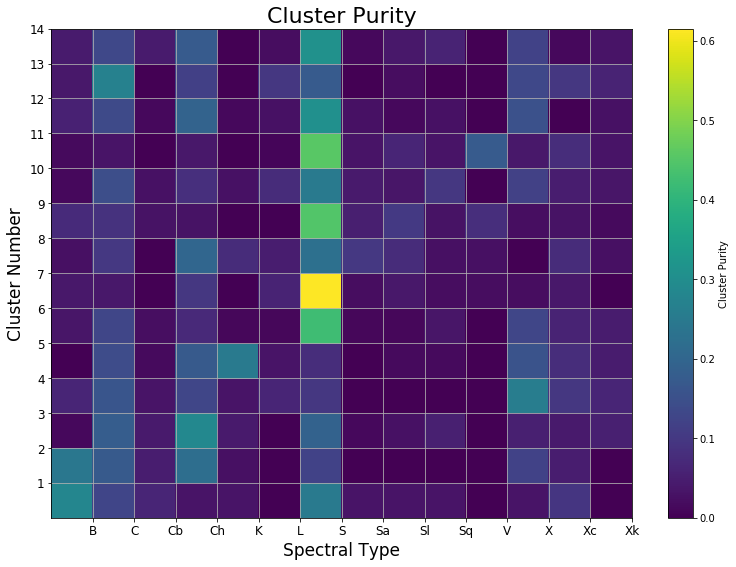

In [25]:
ax = pl.figure(figsize = (13, 9))
pl.pcolor(purityArr, vmin = 0, vmax = np.max(purityArr))
pl.title("Cluster Purity", size = 22)
pl.colorbar(label = "Cluster Purity")
pl.xlabel("Spectral Type", size = 17)
pl.xticks(np.arange(1, numClusters + 1), labels = np.unique(taxonomy.spec_B), size = 12)
pl.ylabel("Cluster Number", size = 17)
pl.yticks(np.arange(1, numClusters + 1), size = 12)
pl.grid();

In [26]:
for i in range(0, numClusters):
  sumNum = 0
  for j in range(0, numClusters):
    sumNum+=purityArr[i,j];
  print("{0:.2f}".format(sumNum))

1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00


## **Distribution of Taxonomic Types**

In [27]:
taxonArr = np.zeros((numClusters, numClusters))
for taxon, taxonNum in zip(np.unique(taxonomy.spec_B), range(0, numClusters)):
  print("For {0}:".format(taxon))
  for clusterNum in range(0, numClusters):
    taxonArr[taxonNum][clusterNum] = (clusterTaxonCts[clusterNum][taxonNum])/taxonomy.spec_B[taxonomy.spec_B == taxon].count()
    print("Cluster {0}: {1:.3f}".format(clusterNum + 1, taxonArr[taxonNum][clusterNum]))
  print("")

For B:
Cluster 1: 0.164
Cluster 2: 0.182
Cluster 3: 0.018
Cluster 4: 0.036
Cluster 5: 0.000
Cluster 6: 0.055
Cluster 7: 0.036
Cluster 8: 0.018
Cluster 9: 0.182
Cluster 10: 0.036
Cluster 11: 0.036
Cluster 12: 0.073
Cluster 13: 0.036
Cluster 14: 0.127

For C:
Cluster 1: 0.029
Cluster 2: 0.051
Cluster 3: 0.095
Cluster 4: 0.036
Cluster 5: 0.066
Cluster 6: 0.080
Cluster 7: 0.015
Cluster 8: 0.029
Cluster 9: 0.088
Cluster 10: 0.153
Cluster 11: 0.029
Cluster 12: 0.073
Cluster 13: 0.102
Cluster 14: 0.153

For Cb:
Cluster 1: 0.074
Cluster 2: 0.074
Cluster 3: 0.111
Cluster 4: 0.037
Cluster 5: 0.037
Cluster 6: 0.074
Cluster 7: 0.000
Cluster 8: 0.000
Cluster 9: 0.148
Cluster 10: 0.148
Cluster 11: 0.000
Cluster 12: 0.037
Cluster 13: 0.000
Cluster 14: 0.259

For Ch:
Cluster 1: 0.008
Cluster 2: 0.068
Cluster 3: 0.158
Cluster 4: 0.030
Cluster 5: 0.083
Cluster 6: 0.045
Cluster 7: 0.038
Cluster 8: 0.060
Cluster 9: 0.030
Cluster 10: 0.090
Cluster 11: 0.038
Cluster 12: 0.105
Cluster 13: 0.045
Cluster 14: 0

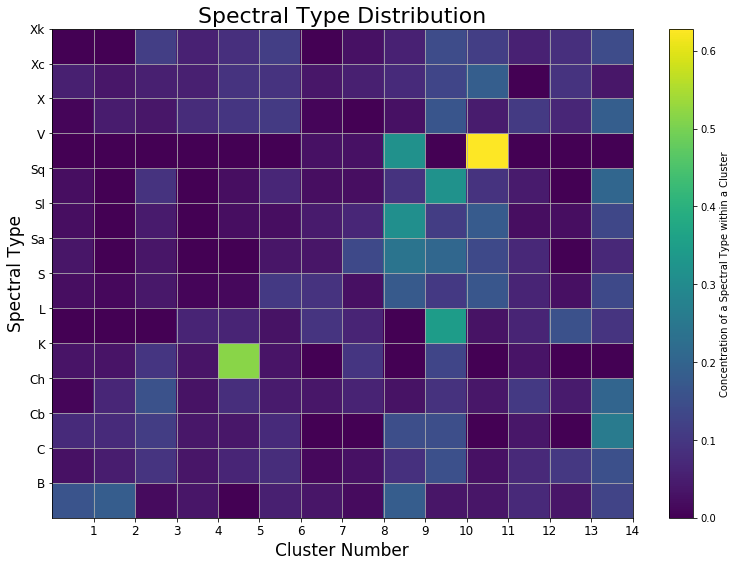

In [28]:
ax = pl.figure(figsize = (13, 9))
pl.pcolor(taxonArr, vmin = 0, vmax = np.max(taxonArr))
pl.title("Spectral Type Distribution", size = 22)
pl.colorbar(label = "Concentration of a Spectral Type within a Cluster")
pl.xlabel("Cluster Number", size = 17)
pl.xticks(np.arange(1, numClusters + 1), size = 12)
pl.ylabel("Spectral Type", size = 17)
pl.yticks(np.arange(1, numClusters + 1), labels = np.unique(taxonomy.spec_B), size = 12)
pl.grid();

## **Cluster Purity Analysis**

In [29]:
purityDf = pd.DataFrame(purityArr, index = np.arange(1, clusterNum+2), columns = np.unique(taxonomy.spec_B))
purityDf.head(numClusters)

,B,C,Cb,Ch,K,L,S,Sa,Sl,Sq,V,X,Xc,Xk
1,0.281250,0.125000,0.062500,0.031250,0.031250,0.000000,0.250000,0.031250,0.031250,0.031250,0.000000,0.031250,0.093750,0.000000
2,0.243902,0.170732,0.048780,0.219512,0.024390,0.000000,0.121951,0.000000,0.000000,0.000000,0.000000,0.121951,0.048780,0.000000
3,0.013699,0.178082,0.041096,0.287671,0.041096,0.000000,0.191781,0.013699,0.027397,0.054795,0.000000,0.054795,0.041096,0.054795
4,0.064516,0.161290,0.032258,0.129032,0.032258,0.064516,0.096774,0.000000,0.000000,0.000000,0.000000,0.258065,0.096774,0.064516
5,0.000000,0.140625,0.015625,0.171875,0.250000,0.031250,0.078125,0.000000,0.015625,0.015625,0.000000,0.156250,0.078125,0.046875
6,0.035294,0.129412,0.023529,0.070588,0.011765,0.011765,0.423529,0.011765,0.011765,0.035294,0.000000,0.129412,0.058824,0.047059
7,0.038462,0.038462,0.000000,0.096154,0.000000,0.057692,0.615385,0.019231,0.038462,0.019231,0.019231,0.019231,0.038462,0.000000
8,0.025000,0.100000,0.000000,0.200000,0.075000,0.050000,0.225000,0.100000,0.075000,0.025000,0.025000,0.000000,0.075000,0.025000
9,0.073529,0.088235,0.029412,0.029412,0.000000,0.000000,0.448529,0.051471,0.102941,0.029412,0.080882,0.022059,0.029412,0.014706
10,0.013889,0.145833,0.027778,0.083333,0.027778,0.076389,0.250000,0.041667,0.034722,0.097222,0.000000,0.118056,0.048611,0.034722


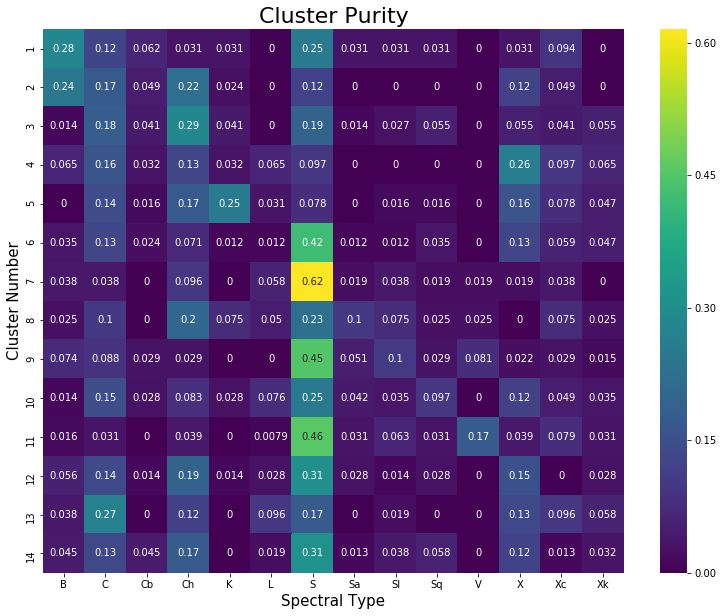

In [30]:
ax = pl.figure(figsize = (13,10))
seaborn.heatmap(purityDf, annot = True, cmap = 'viridis')
pl.xlabel("Spectral Type", size = 15)
pl.ylabel("Cluster Number", size = 15)
pl.title("Cluster Purity", size = 22);

In [31]:
purity = np.zeros(numClusters)
purityType = [None] * numClusters
for clustNum in range(0, numClusters):
  for taxonNum in range(0, numClusters):
    if (purityArr[clustNum][taxonNum] > purity[clustNum]):
      purity[clustNum] = purityArr[clustNum][taxonNum]
      purityType[clustNum] = (np.unique(taxonomy.spec_B))[taxonNum]

print(purity, "\n", purityType)

[0.28125    0.24390244 0.28767123 0.25806452 0.25       0.42352941
 0.61538462 0.225      0.44852941 0.25       0.45669291 0.30555556
 0.26923077 0.30769231] 
 ['B', 'B', 'Ch', 'X', 'K', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S']


In [32]:
for i in range(0, numClusters):
  print("Cluster {0} is of Size {1:.0f} and has a Purity of {2:0.3f} Corresponding to a Spectral Type of {3}".format(i + 1, clusterCts[i], purity[i], purityType[i]))

Cluster 1 is of Size 32 and has a Purity of 0.281 Corresponding to a Spectral Type of B
Cluster 2 is of Size 41 and has a Purity of 0.244 Corresponding to a Spectral Type of B
Cluster 3 is of Size 73 and has a Purity of 0.288 Corresponding to a Spectral Type of Ch
Cluster 4 is of Size 31 and has a Purity of 0.258 Corresponding to a Spectral Type of X
Cluster 5 is of Size 64 and has a Purity of 0.250 Corresponding to a Spectral Type of K
Cluster 6 is of Size 85 and has a Purity of 0.424 Corresponding to a Spectral Type of S
Cluster 7 is of Size 52 and has a Purity of 0.615 Corresponding to a Spectral Type of S
Cluster 8 is of Size 40 and has a Purity of 0.225 Corresponding to a Spectral Type of S
Cluster 9 is of Size 136 and has a Purity of 0.449 Corresponding to a Spectral Type of S
Cluster 10 is of Size 144 and has a Purity of 0.250 Corresponding to a Spectral Type of S
Cluster 11 is of Size 127 and has a Purity of 0.457 Corresponding to a Spectral Type of S
Cluster 12 is of Size 72 a